<a href="https://colab.research.google.com/github/Nim-ah/MIE1614_Naive_Bias/blob/main/Naive_Bayes_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


#Pre Processing

In [125]:
text_data = open('SMSSpamCollection')
text = []
labels = []
for word in text_data:
    labels.append(word[:4].strip())
    text.append(word[4:].strip())

In [126]:
df = pd.DataFrame({"labels":labels, "text": text})
df

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [98]:
df2 = df['labels'][0:]
df_answers_encode = {}
for i, answer in enumerate(df2):
    #print(answer)
    if answer == "spam":
      df_answers_encode[answer] = 1
    else:
      df_answers_encode[answer] = 0

df['labels'] = df2.map(df_answers_encode)

In [99]:
df

,labels,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will ü b going to esplanade fr home?
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...


# Vectorization

In [117]:
cv = CountVectorizer()
X = cv.fit_transform(df.text).toarray()
y = df.labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [143]:
print(cv.fit_transform(df.labels)[0:10])

  (0, 0)	1
  (1, 0)	1
  (2, 1)	1
  (3, 0)	1
  (4, 0)	1
  (5, 1)	1
  (6, 0)	1
  (7, 0)	1
  (8, 1)	1
  (9, 1)	1


#Models

In [109]:
import matplotlib.pyplot as plt
# Taken from the scikit-learn documentation
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if title == True:
          title = 'Confusion matrix for model (A)'
    else:
          title = 'Confusion matrix for ULMFiT'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [136]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

 # BernoulliNB
 - Hyperparameters
  - *, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=Non
  
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB 

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[[974   3]
 [  8 130]]
0.9901345291479821
0.9594095940959411
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       977
           1       0.98      0.94      0.96       138

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



<AxesSubplot:title={'center':'Confusion matrix for ULMFiT'}, xlabel='Predicted label', ylabel='True label'>

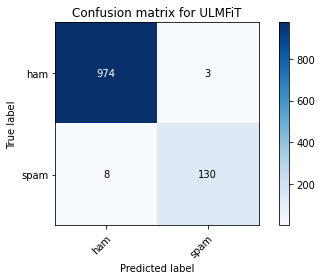

In [137]:
classifier = BernoulliNB(alpha=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)
f1_s = f1_score(y_test, y_pred)
print(f1_s)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=["ham", "spam"])

 # GaussianNB

 - Hyperparameters
  - *, priors=None, var_smoothing=1e-09

  https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

[[883  94]
 [  8 130]]
0.9085201793721973
0.718232044198895
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       977
           1       0.58      0.94      0.72       138

    accuracy                           0.91      1115
   macro avg       0.79      0.92      0.83      1115
weighted avg       0.94      0.91      0.92      1115



<AxesSubplot:title={'center':'Confusion matrix for ULMFiT'}, xlabel='Predicted label', ylabel='True label'>

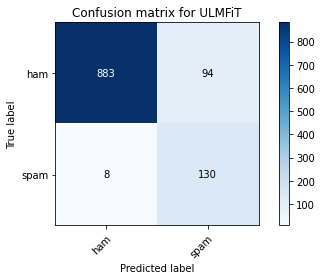

In [141]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)
f1_s = f1_score(y_test, y_pred)
print(f1_s)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=["ham", "spam"])

 # MultinomialNB
 - Hyperparameters 
  - (*, alpha=1.0, fit_prior=True, class_prior=None)

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [144]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)
f1_s = f1_score(y_test, y_pred)
print(f1_s)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=["ham", "spam"])

TypeError: ignored